In [1]:
import pandas as pd

In [2]:
file_path = '/Users/yoonjiha/Desktop/파란학기/bluesemesterdata/ver-test2'

In [3]:
df = pd.read_csv(file_path + "/chain-market.csv")
df

,_time,chainName,ath,athDate,atl,atlDate,cap,capChange24h,capChangeRatio24H,capRank,...,low24h,price,priceChangePercentage14d,priceChangePercentage1H,priceChangePercentage1Y,priceChangePercentage24H,priceChangePercentage30D,priceChangePercentage7d,supplyCirculating,totalVolume
0,2023-01-22T03:17:05.617Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3859684388,147701676,3.97905,22,...,12.710000,13.230000,28.957470,-0.485600,-66.135479,4.076443,49.739968,6.656563,292586163.8,286045792
1,2023-01-22T04:00:02.782Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3907744616,176277536,4.72408,22,...,12.740000,13.400000,30.548036,1.262951,-65.717793,5.109553,51.586867,7.972070,292586163.8,270717200
2,2023-01-22T05:00:02.824Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3927643247,184235063,4.92159,22,...,12.790000,13.400000,30.600500,0.109195,-65.704016,4.756726,51.647786,8.015461,292586163.8,278476575
3,2023-01-22T06:00:03.313Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3937783620,102299572,2.66719,22,...,12.930000,13.430000,30.878275,-0.008200,-65.631072,2.355746,51.970326,8.245199,292586163.8,256725694
4,2023-01-22T07:00:02.713Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.160000,2020-03-13T02:27:44.591Z,3924998829,104038978,2.72285,22,...,12.930000,13.400000,30.615193,-0.020446,-65.700158,2.552304,51.664846,8.027613,292586163.8,248758707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,2023-05-08T07:00:03.646Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,404983121,-133274,-0.03290,103,...,0.698869,0.702410,-8.971425,0.211146,-81.515948,-0.091975,-10.970256,-10.630145,576419817.0,8394496
10057,2023-05-08T08:00:03.493Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,403448043,-670280,-0.16586,103,...,0.698869,0.700059,-9.276131,-0.328301,-81.577821,-0.197546,-11.268271,-10.929299,576419817.0,8384778
10058,2023-05-08T09:00:03.878Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,402169705,-1425917,-0.35330,103,...,0.697954,0.699504,-9.348001,-0.108675,-81.592415,-0.346475,-11.338563,-10.999859,576419817.0,8623022
10059,2023-05-08T10:00:03.496Z,osmosis,11.25,2022-03-04T05:12:18.707Z,0.678606,2023-01-01T05:30:08.710Z,403875678,753035,0.18680,103,...,0.696605,0.700127,-7.522812,0.080149,-80.316698,-0.052793,-9.789265,-9.837682,576419817.0,8790759


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _time                     10061 non-null  object 
 1   chainName                 10061 non-null  object 
 2   ath                       10061 non-null  float64
 3   athDate                   10061 non-null  object 
 4   atl                       10061 non-null  float64
 5   atlDate                   10061 non-null  object 
 6   cap                       10061 non-null  int64  
 7   capChange24h              10061 non-null  int64  
 8   capChangeRatio24H         10061 non-null  float64
 9   capRank                   10061 non-null  int64  
 10  change24h                 10061 non-null  float64
 11  changeRatio24H            10061 non-null  float64
 12  high24h                   10061 non-null  float64
 13  low24h                    10061 non-null  float64
 14  price 

In [5]:
df.chainName.unique()

array(['cosmos', 'juno', 'kava', 'osmosis'], dtype=object)

In [6]:
cos_df = pd.DataFrame()
juno_df = pd.DataFrame()
kava_df = pd.DataFrame()
osmo_df = pd.DataFrame()

## 1시간 가격변화량ARIMA 예측

### 필요한 데이터만 뽑기

In [7]:
cos_df['date'] = df[df['chainName'] == 'cosmos']['_time'].values
cos_df['change'] = df[df['chainName'] == 'cosmos']['priceChangePercentage1H'].values

juno_df['date'] = df[df['chainName'] == 'juno']['_time'].values
juno_df['change'] = df[df['chainName'] == 'juno']['priceChangePercentage1H'].values

kava_df['date'] = df[df['chainName'] == 'kava']['_time'].values
kava_df['change'] = df[df['chainName'] == 'kava']['priceChangePercentage1H'].values

osmo_df['date'] = df[df['chainName'] == 'osmosis']['_time'].values
osmo_df['change'] = df[df['chainName'] == 'osmosis']['priceChangePercentage1H'].values

In [8]:
osmo_df

,date,change
0,2023-01-22T03:17:05.624Z,-0.343344
1,2023-01-22T04:00:03.054Z,1.091181
2,2023-01-22T05:00:03.237Z,0.066097
3,2023-01-22T06:00:03.333Z,0.167722
4,2023-01-22T07:00:03.08Z,-0.441181
...,...,...
2513,2023-05-08T07:00:03.646Z,0.211146
2514,2023-05-08T08:00:03.493Z,-0.328301
2515,2023-05-08T09:00:03.878Z,-0.108675
2516,2023-05-08T10:00:03.496Z,0.080149


In [9]:
cos_df['date'] = pd.to_datetime(cos_df['date'])
cos_df = cos_df.set_index('date')
juno_df['date'] = pd.to_datetime(juno_df['date'])
juno_df = juno_df.set_index('date')
kava_df['date'] = pd.to_datetime(kava_df['date'])
kava_df = kava_df.set_index('date')
osmo_df['date'] = pd.to_datetime(osmo_df['date'])
osmo_df = osmo_df.set_index('date')


cos_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2023-01-22 03:17:05.617000+00:00 to 2023-05-08 11:00:03.355000+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   change  2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [10]:
osmo_df

,change
date,
2023-01-22 03:17:05.624000+00:00,-0.343344
2023-01-22 04:00:03.054000+00:00,1.091181
2023-01-22 05:00:03.237000+00:00,0.066097
2023-01-22 06:00:03.333000+00:00,0.167722
2023-01-22 07:00:03.080000+00:00,-0.441181
...,...
2023-05-08 07:00:03.646000+00:00,0.211146
2023-05-08 08:00:03.493000+00:00,-0.328301
2023-05-08 09:00:03.878000+00:00,-0.108675


In [11]:
import matplotlib.pyplot as plt

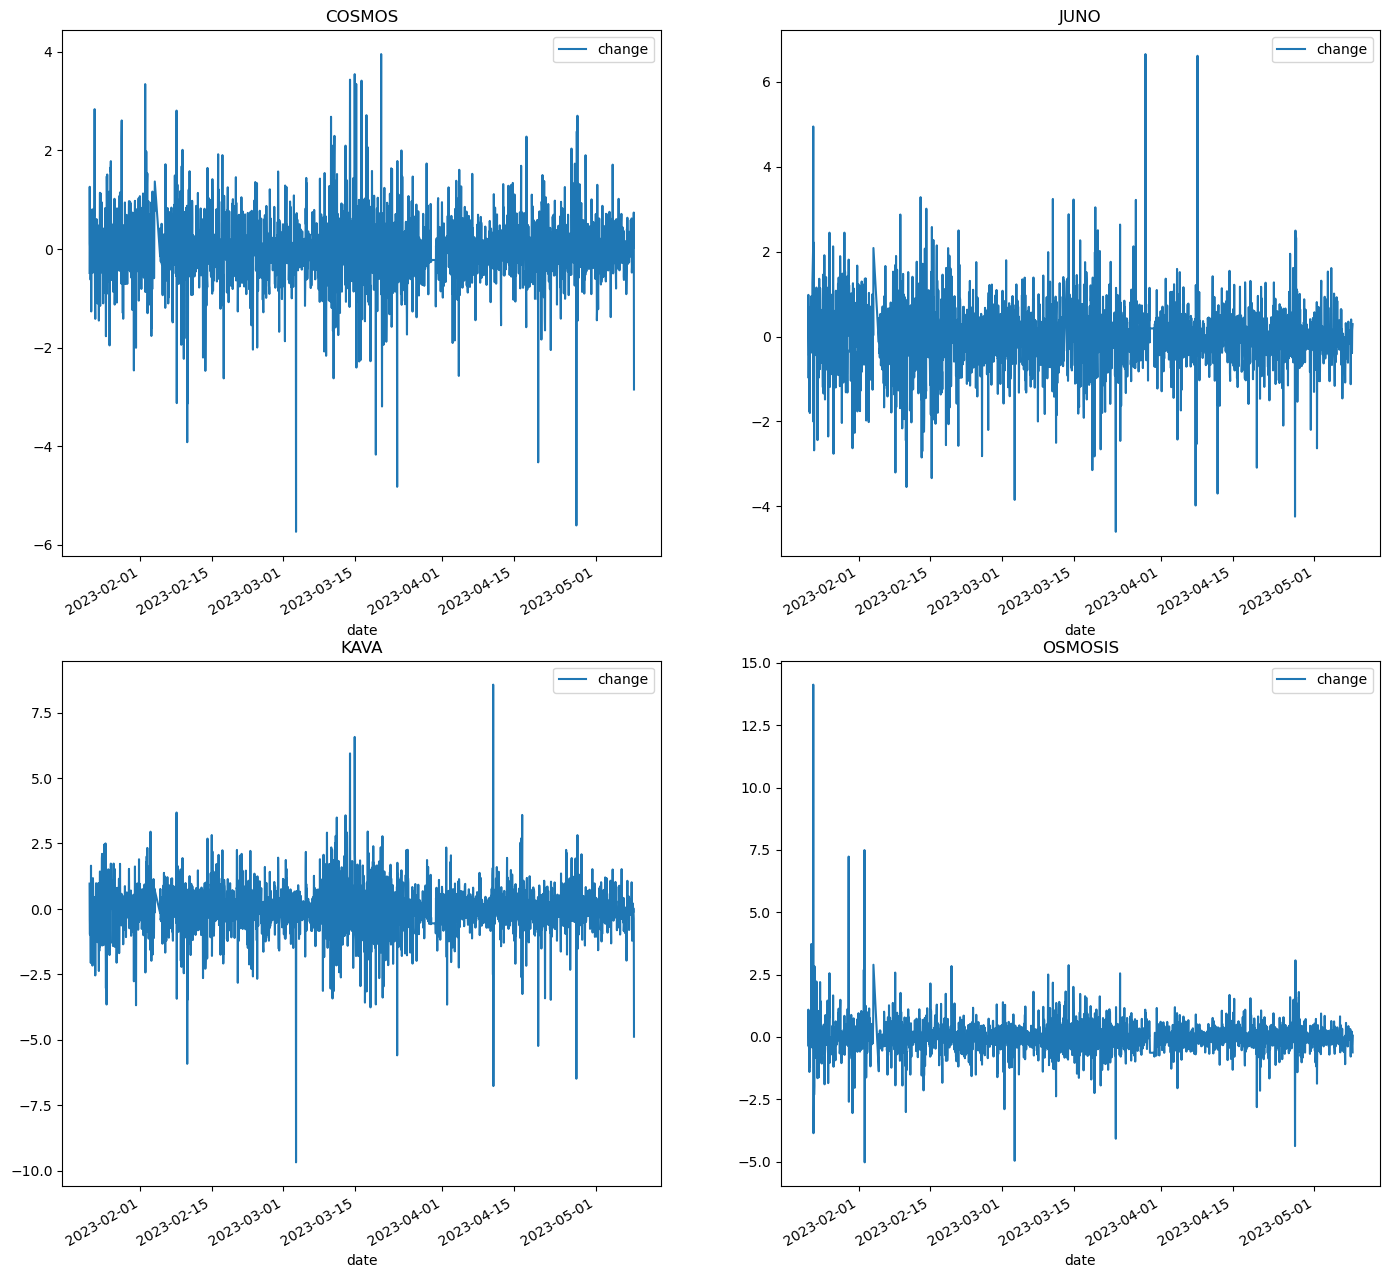

In [12]:
fig, axs = plt.subplots(2,2, figsize=(17,17))
ax1, ax2, ax3, ax4 = axs.flatten()

ax1 = cos_df.plot(ax=ax1)
ax1.set_title('COSMOS')
ax2 = juno_df.plot(ax=ax2)
ax2.set_title('JUNO')
ax3 = kava_df.plot(ax=ax3)
ax3.set_title('KAVA')
ax4 = osmo_df.plot(ax=ax4)
ax4.set_title('OSMOSIS')

plt.show()

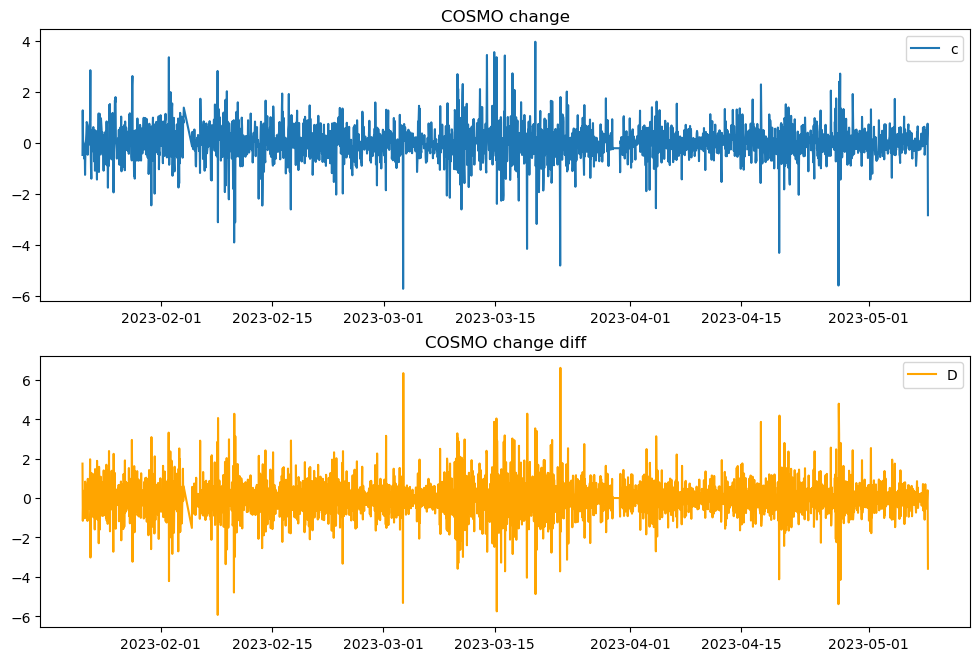

In [13]:
import matplotlib.pyplot as plt
# cap 차분 데이터
diff_series = cos_df.change.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('COSMO change')
plt.plot(cos_df)
plt.legend('cap data')
plt.subplot(312)
plt.title('COSMO change diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


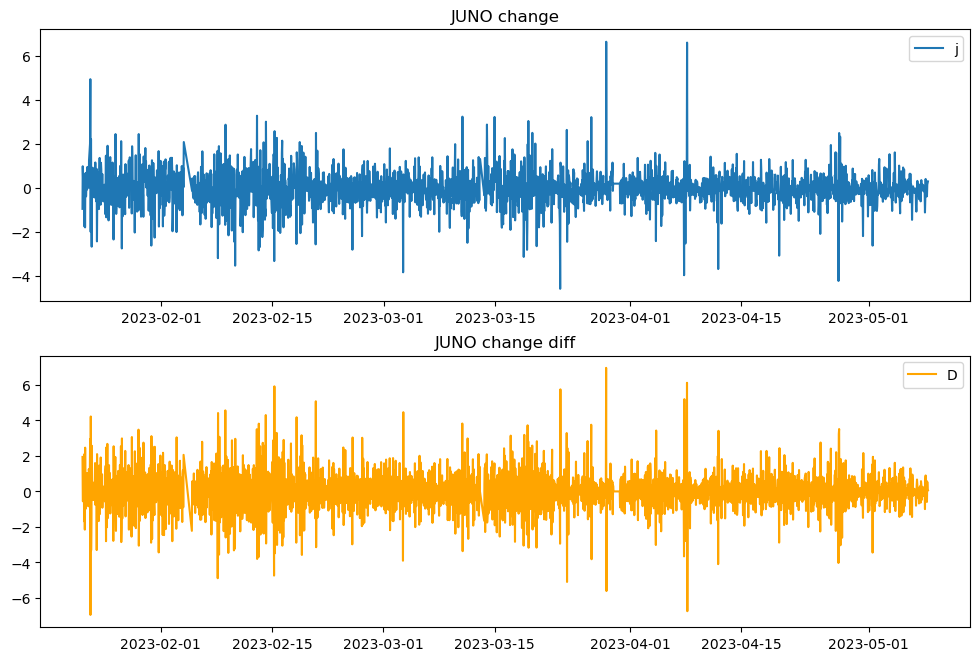

In [14]:
diff_series = juno_df.change.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('JUNO change')
plt.plot(juno_df)
plt.legend('juno Data')
plt.subplot(312)
plt.title('JUNO change diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


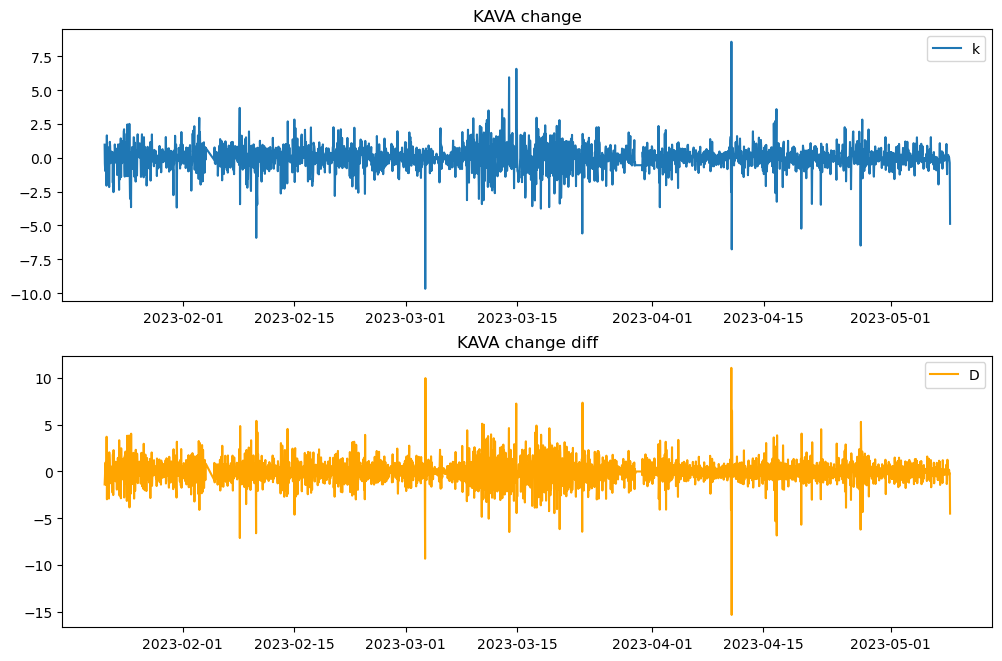

In [15]:
diff_series = kava_df.change.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('KAVA change')
plt.plot(kava_df)
plt.legend('kava Data')
plt.subplot(312)
plt.title('KAVA change diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


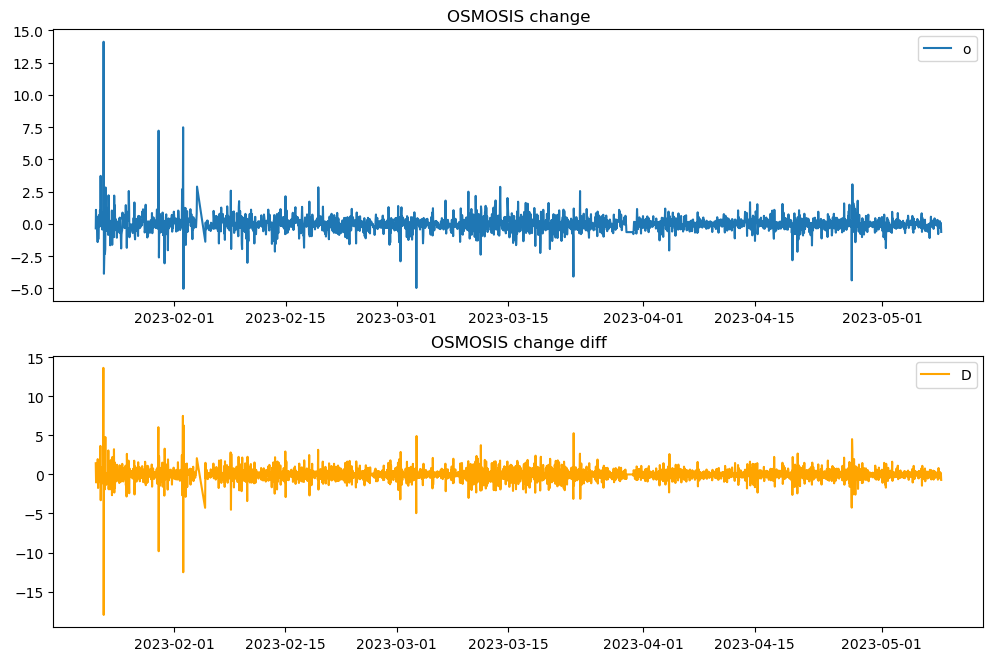

In [16]:
diff_series = osmo_df.change.diff().dropna()

plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title('OSMOSIS change')
plt.plot(osmo_df)
plt.legend('osmosis Data')
plt.subplot(312)
plt.title('OSMOSIS change diff')
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')


### ARIMA 모수 설정

In [17]:
!pip install pmdarima

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 정상성 test

In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

### COSMOS ARIMA

In [20]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' %result[0])
    print('p-value: %f' %result[1])
    print('Critical values: ')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
        
print('ADF Test: time series')
adf_test(cos_df)
adf_test(cos_df['change'].diff().dropna())

ADF Test: time series
ADF Statistics: -50.277125
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -16.431988
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [21]:
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS statistics: {statistic}')
    print(f'p_value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values: ')
    for key, value in critical_values.items():
        print(f' {key} : {value}')

print('KPSS Test: time series')
kpss_test(cos_df['change'])
kpss_test(cos_df['change'].diff().dropna())
# 0.05보다 작으면 안정적이지 않다는 뜻

KPSS Test: time series
KPSS statistics: 0.09501263996526185
p_value: 0.1
num lags: 11
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.17342587310613014
p_value: 0.1
num lags: 192
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


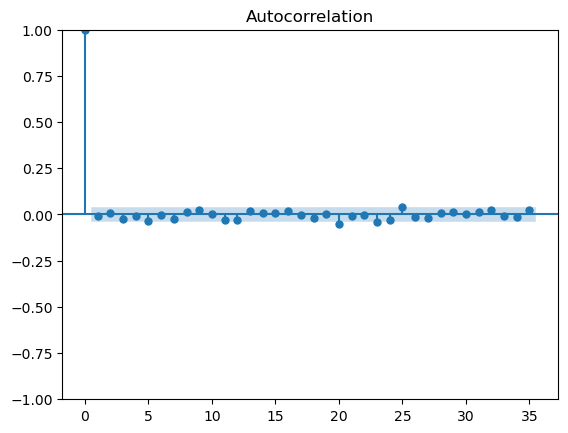

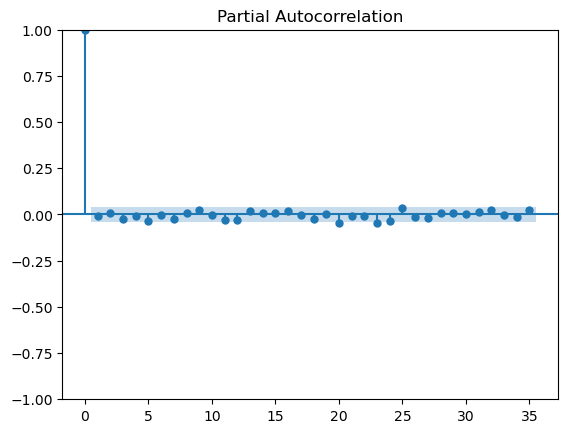

In [22]:
plot_acf(cos_df)
plot_pacf(cos_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


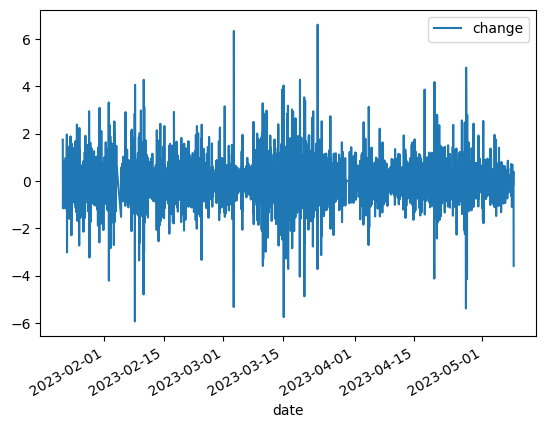

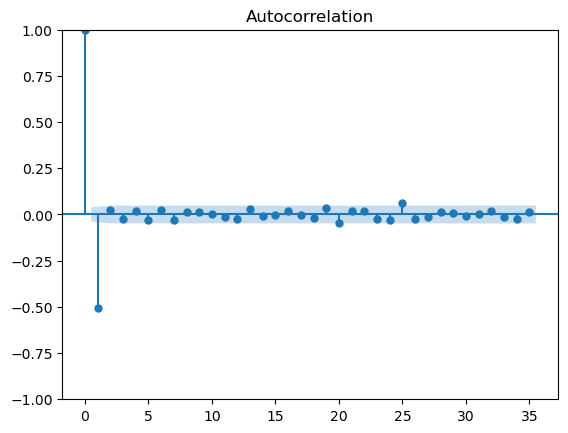

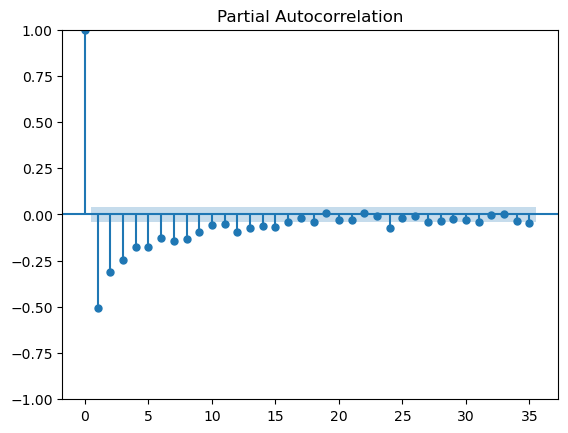

In [23]:
diff_1=cos_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [24]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(cos_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(cos_df)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5464.670, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5466.584, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5468.476, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5468.709, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5466.582, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5467.229, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5467.736, Time=0.36 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5468.193, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5468.468, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5468.918, Time=0.33 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5471.228, Time=0.70 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5469.177, Time=1.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5468.691, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5468.183, Time=0.70 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5469.156, Time=0.70 sec

Best mode

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cos_df, test_size=0.2, shuffle=False)

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(train_df, order=(0,0,0), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10634D+00    |proj g|=  1.26077D+01

At iterate    1    f=  1.10634D+00    |proj g|=  1.26077D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   1.261D+01   1.106D+00
  F =   1.1063405104092314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:                 change   No. Observati


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='date'>

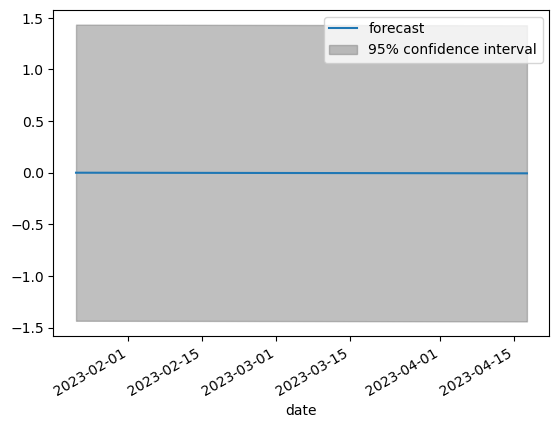

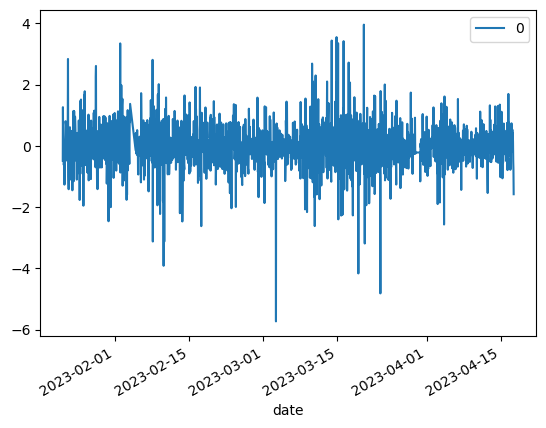

In [38]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [39]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


change,mean,mean_se,mean_ci_lower,mean_ci_upper
2012,-0.006044,0.731544,-1.439844,1.427755
2013,-0.006047,0.731544,-1.439847,1.427752
2014,-0.006050,0.731544,-1.439850,1.427749
2015,-0.006053,0.731544,-1.439853,1.427746
2016,-0.006056,0.731544,-1.439856,1.427743
...,...,...,...,...
2511,-0.007543,0.731544,-1.441343,1.426256
2512,-0.007546,0.731544,-1.441346,1.426253
2513,-0.007549,0.731544,-1.441349,1.426250
2514,-0.007552,0.731544,-1.441352,1.426247


In [40]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

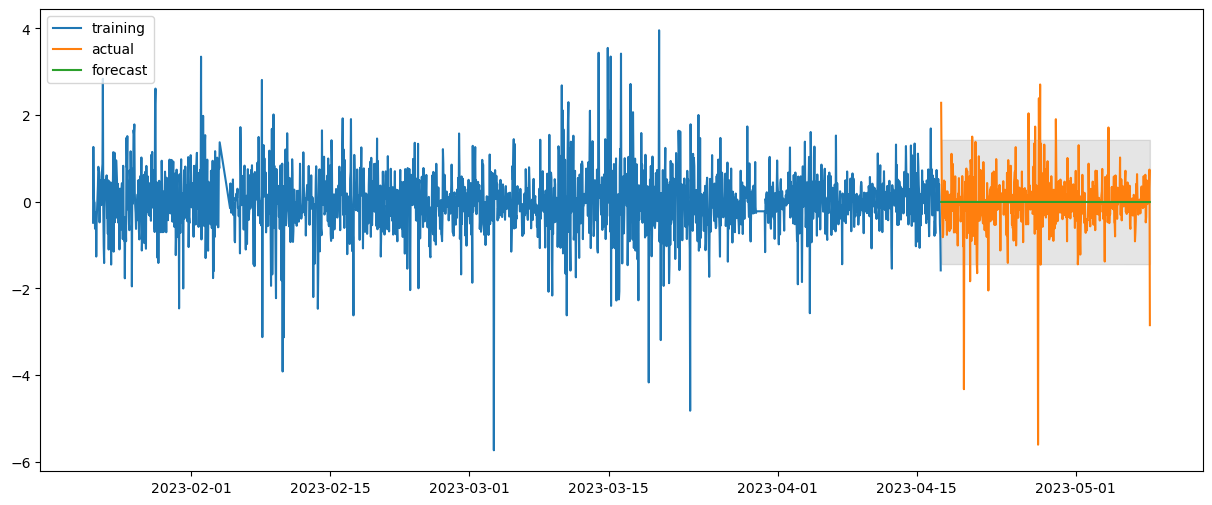

In [41]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### JUNO ARIMA

In [42]:
adf_test(juno_df['change'])
adf_test(juno_df['change'].diff().dropna())

ADF Statistics: -52.360349
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -16.111602
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [43]:
kpss_test(juno_df['change'])
kpss_test(juno_df['change'].diff().dropna())

KPSS statistics: 0.1039408877341036
p_value: 0.1
num lags: 8
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.2837142504955309
p_value: 0.1
num lags: 1419
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


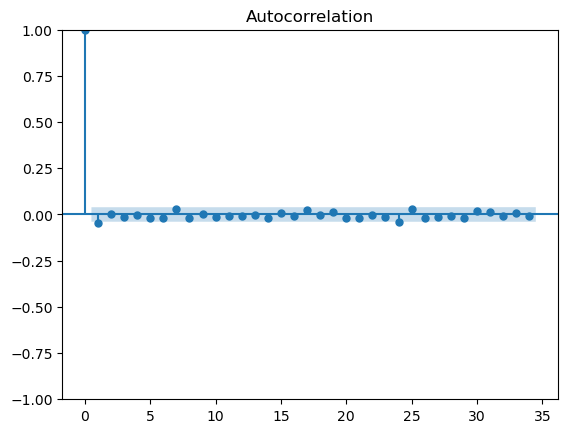

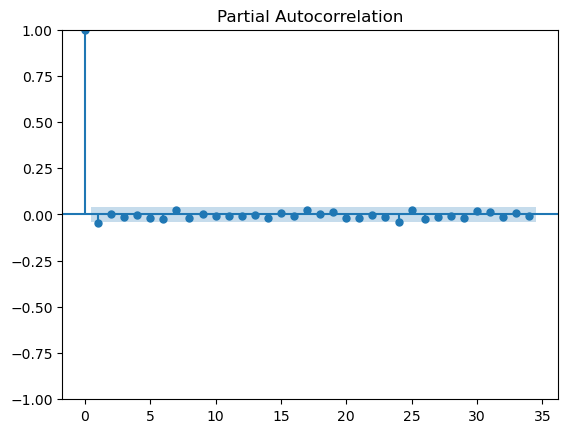

In [44]:
plot_acf(juno_df)
plot_pacf(juno_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


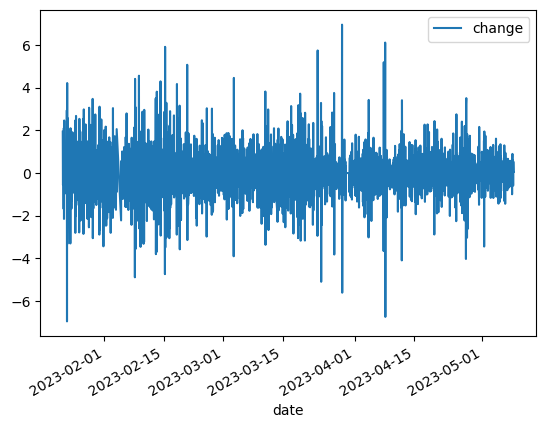

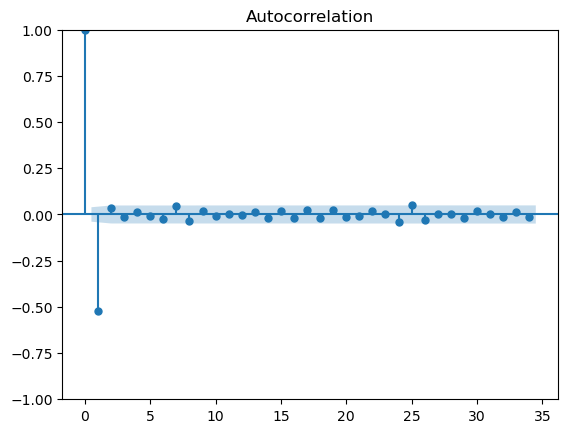

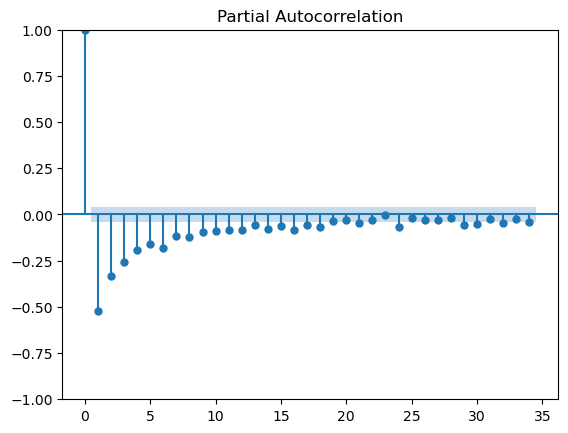

In [45]:
diff_1=juno_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [46]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(juno_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(juno_df)


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5982.993, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5980.255, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5982.195, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5983.806, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5980.213, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5982.137, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5984.079, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5985.790, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5982.172, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5984.177, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5984.915, Time=0.66 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5987.765, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5983.815, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5985.814, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5987.624, Time=0.44 sec

Best mode

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [47]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(juno_df, test_size=0.2, shuffle=False)

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(train_df, order=(1,0,0), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24065D+00    |proj g|=  9.57514D+00

At iterate    1    f=  1.24065D+00    |proj g|=  9.57514D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     19      1     0     0   9.575D+00   1.241D+00
  F =   1.2406454285698281     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:                 change   No. Observati


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='date'>

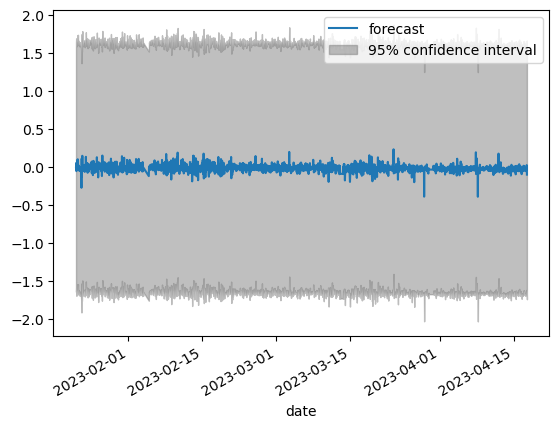

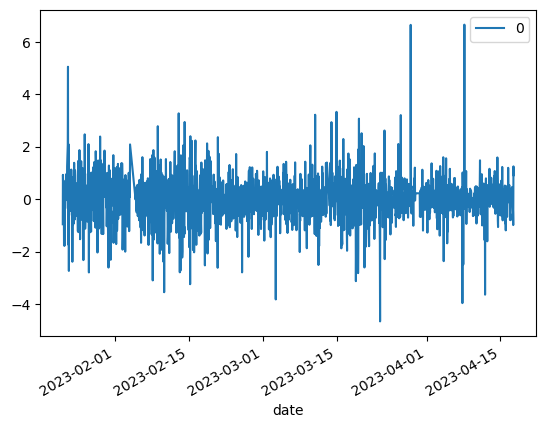

In [49]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [50]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


change,mean,mean_se,mean_ci_lower,mean_ci_upper
2006,-0.074727,0.836633,-1.714497,1.565043
2007,-0.025551,0.837907,-1.667818,1.616717
2008,-0.028281,0.837911,-1.670556,1.613995
2009,-0.028145,0.837911,-1.670420,1.614131
2010,-0.028167,0.837911,-1.670443,1.614108
...,...,...,...,...
2503,-0.035075,0.837911,-1.677350,1.607201
2504,-0.035089,0.837911,-1.677364,1.607187
2505,-0.035103,0.837911,-1.677378,1.607172
2506,-0.035117,0.837911,-1.677392,1.607158


In [51]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

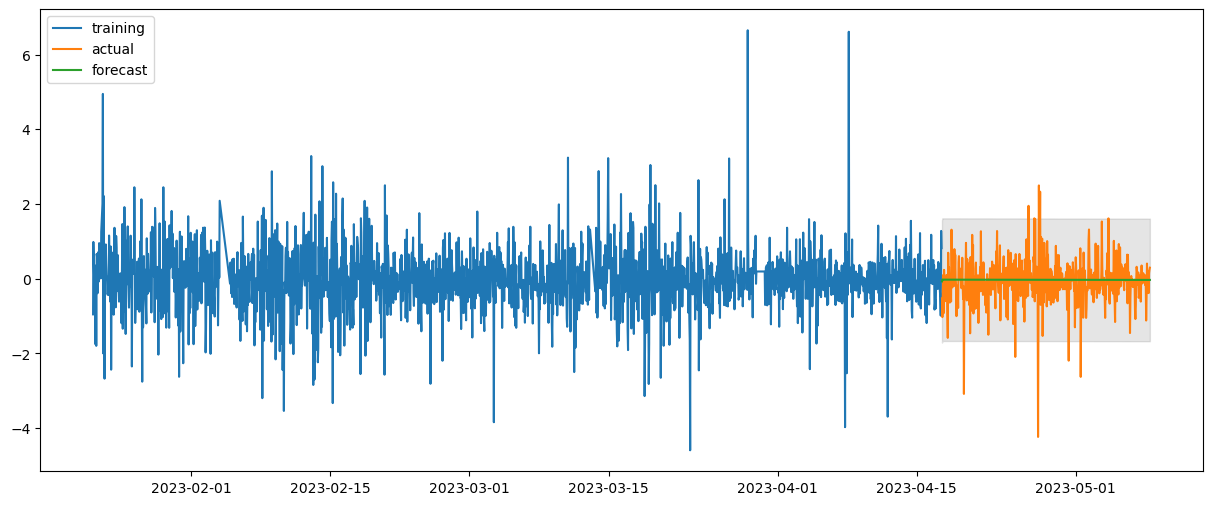

In [52]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### KAVA ARIMA

In [53]:
adf_test(kava_df['change'])
adf_test(kava_df['change'].diff().dropna())

ADF Statistics: -52.033071
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -16.691171
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [54]:
kpss_test(kava_df['change'])
kpss_test(kava_df['change'].diff().dropna())

KPSS statistics: 0.08636885252135777
p_value: 0.1
num lags: 3
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.24335237624772332
p_value: 0.1
num lags: 672
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


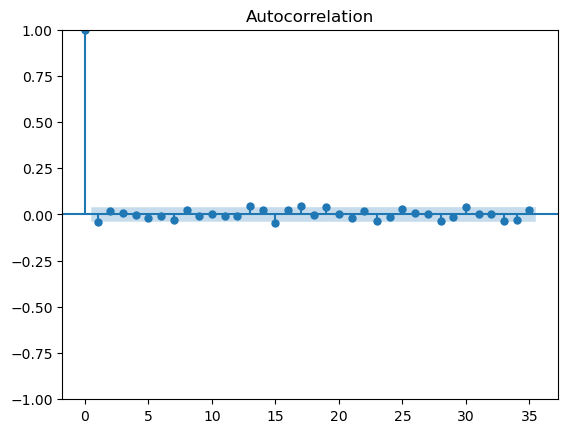

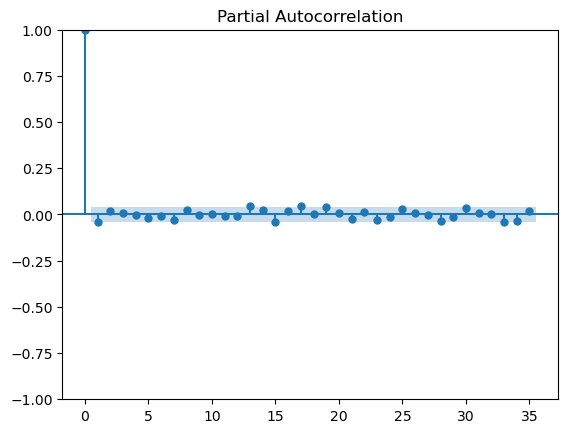

In [55]:
plot_acf(kava_df)
plot_pacf(kava_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


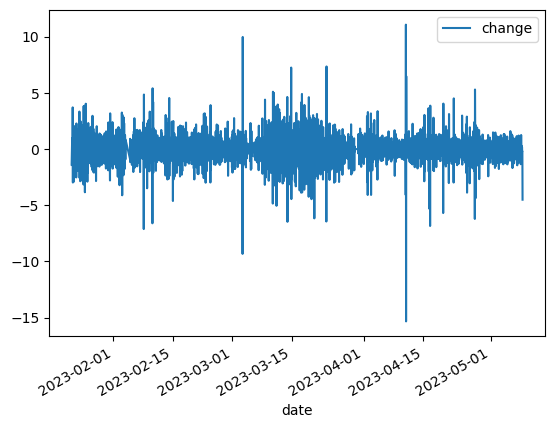

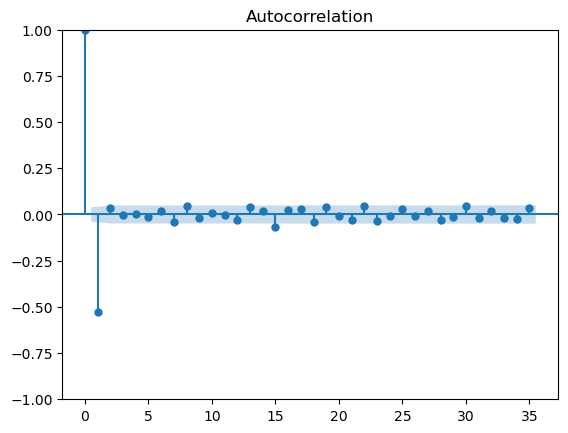

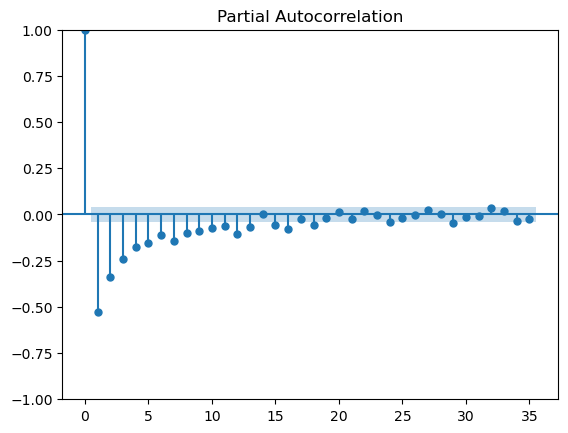

In [56]:
diff_1=kava_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [57]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(kava_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(kava_df)


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7023.228, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7021.169, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=7021.985, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=7023.770, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7021.003, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7022.387, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7023.852, Time=0.51 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7025.985, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7022.068, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7023.914, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7019.000, Time=1.23 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=7026.400, Time=0.98 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7023.807, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=7025.808, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7027.740, Time=0.39 sec

Best mode

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [58]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(kava_df, test_size=0.2, shuffle=False)

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(train_df, order=(2,0,2), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43302D+00    |proj g|=  8.00572D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   8.006D+00   1.433D+00
  F =   1.4330201915155940     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                 change   No. Observations:                 2015
Model:               SARIMAX(2, 0, 2


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

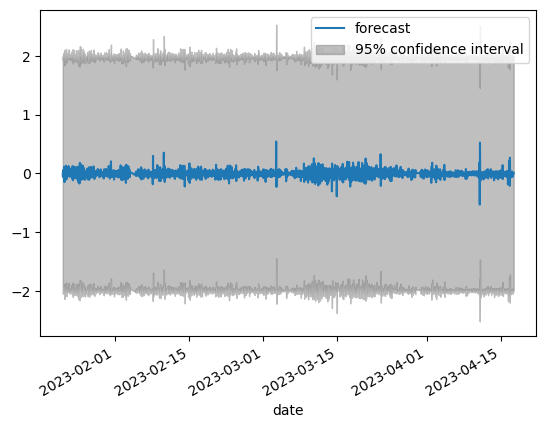

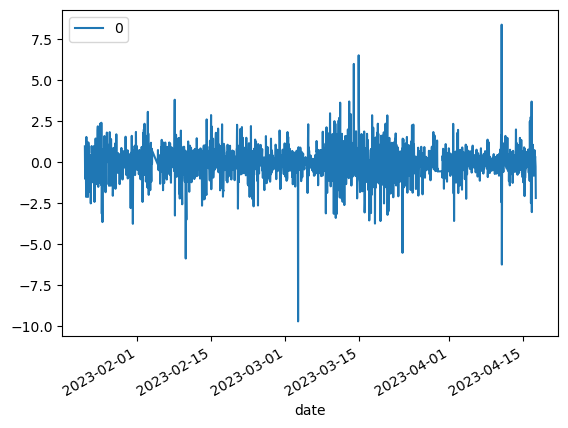

In [60]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [61]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


change,mean,mean_se,mean_ci_lower,mean_ci_upper
2015,0.110612,1.013745,-1.876291,2.097515
2016,-0.064185,1.015422,-2.054376,1.926006
2017,-0.033546,1.015716,-2.024314,1.957221
2018,-0.007429,1.015786,-1.998334,1.983475
2019,-0.004892,1.015786,-1.995796,1.986013
...,...,...,...,...
2514,-0.009716,1.015787,-2.000622,1.981191
2515,-0.009720,1.015787,-2.000626,1.981187
2516,-0.009723,1.015787,-2.000630,1.981183
2517,-0.009727,1.015787,-2.000634,1.981179


In [62]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

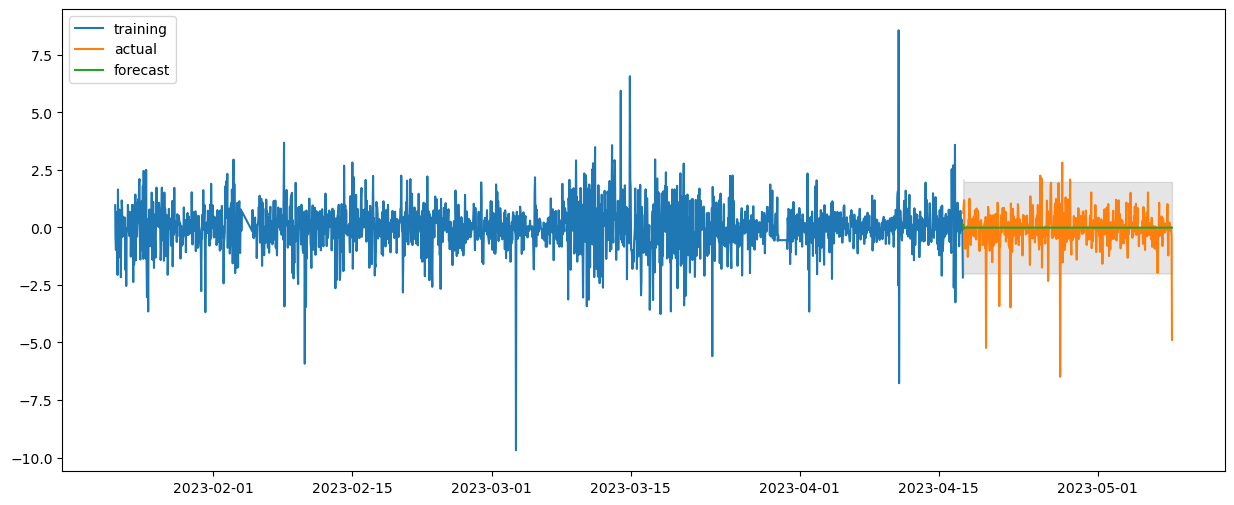

In [63]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### OSMOSIS ARIMA

In [64]:
adf_test(osmo_df['change'])
adf_test(osmo_df['change'].diff().dropna())

ADF Statistics: -52.103899
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistics: -15.393440
p-value: 0.000000
Critical values: 
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [65]:
kpss_test(osmo_df['change'])
kpss_test(osmo_df['change'].diff().dropna())

KPSS statistics: 0.27778014178317767
p_value: 0.1
num lags: 9
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.036296352787455244
p_value: 0.1
num lags: 130
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


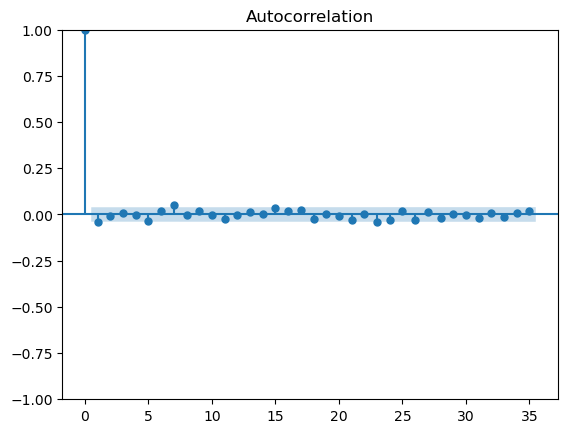

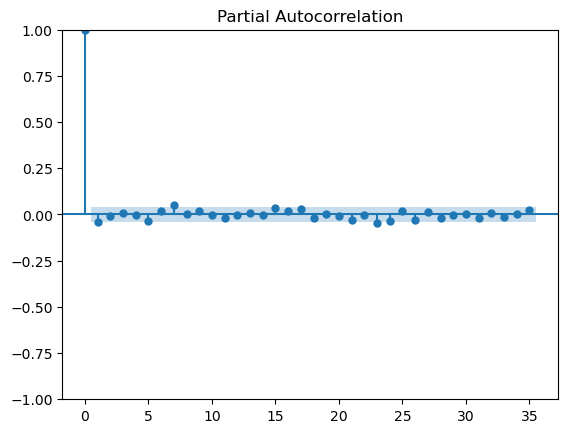

In [66]:
plot_acf(osmo_df)
plot_pacf(osmo_df)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


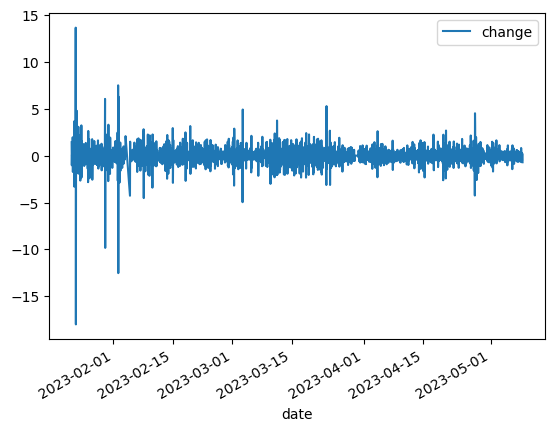

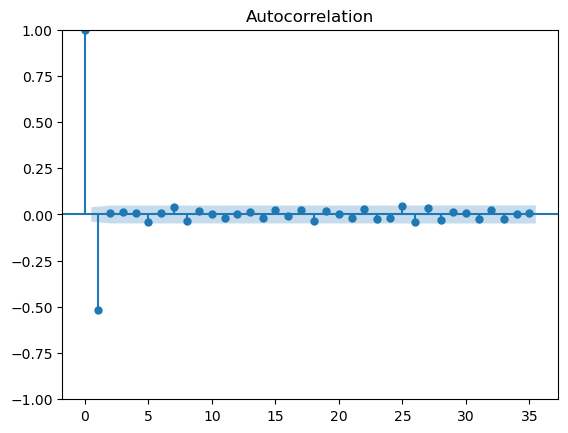

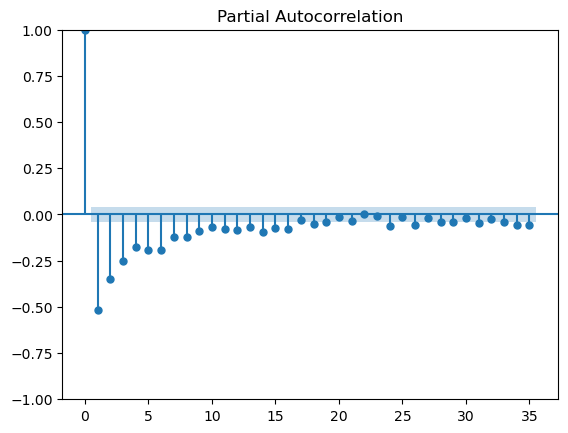

In [67]:
diff_1=osmo_df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show() 

In [68]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(osmo_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(osmo_df)


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5402.507, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5400.800, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5402.737, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5404.568, Time=0.13 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=5406.478, Time=0.17 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=5405.908, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5400.844, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5402.756, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5404.758, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5406.559, Time=0.43 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=5408.237, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5402.718, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5404.724, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.39 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.45 sec
 ARIMA(3,0,0)(0,0,0)

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [69]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(osmo_df, test_size=0.2, shuffle=False)

In [70]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

model = SARIMAX(train_df, order=(0,0,1), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12361D+00    |proj g|=  1.22281D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   1.223D+01   1.124D+00
  F =   1.1236077477231945     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                 change   No. Observations:                 2014
Model:               SARIMAX(0, 0, 1

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<Axes: xlabel='date'>

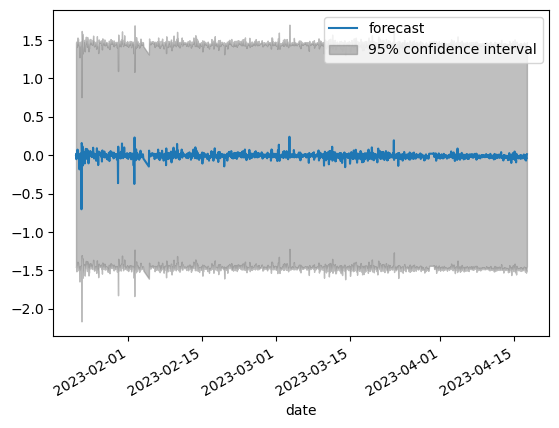

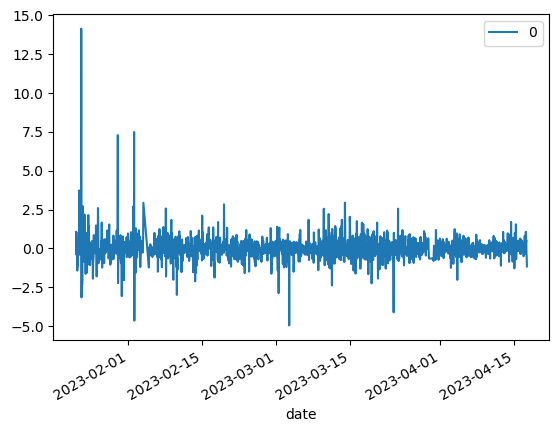

In [71]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [72]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


change,mean,mean_se,mean_ci_lower,mean_ci_upper
2014,0.039936,0.744585,-1.419424,1.499295
2015,-0.018026,0.745509,-1.479196,1.443144
2016,-0.018035,0.745509,-1.479205,1.443135
2017,-0.018044,0.745509,-1.479214,1.443126
2018,-0.018052,0.745509,-1.479222,1.443117
...,...,...,...,...
2513,-0.022481,0.745509,-1.483651,1.438689
2514,-0.022490,0.745509,-1.483660,1.438680
2515,-0.022499,0.745509,-1.483668,1.438671
2516,-0.022507,0.745509,-1.483677,1.438663


In [73]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

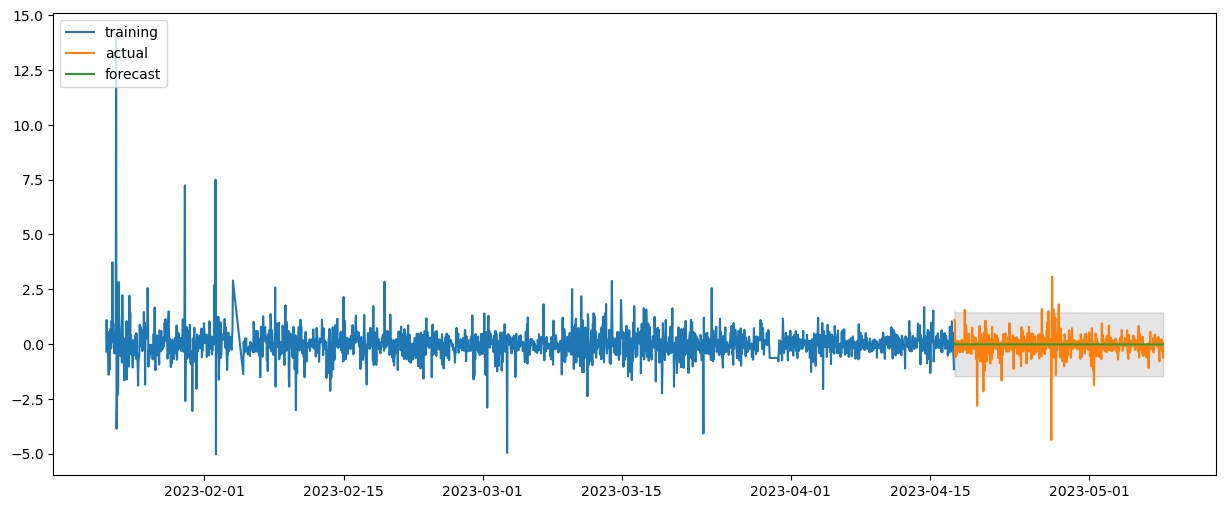

In [74]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()